<a href="https://colab.research.google.com/github/KAILASHVenkat/Signals-project/blob/main/MFCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MFCC (Mel-Frequency Cepstral Coefficients) is a way to represent the characteristics of sound in a form that computers can understand. It's like taking a "snapshot" of how sounds change over a short period. These snapshots are used for things like recognizing spoken words or classifying different sounds, such as identifying music genres.Here are the steps to calculate MFCC values:



1.   Pre-emphasis: Boost high-frequency components.
2.   Framing: Divide the audio signal into short, overlapping frames.
3.   Windowing: Apply a window function to each frame.
4.   Fast Fourier Transform (FFT): Compute the power spectrum of each frame.
5.   Mel-filter bank: Apply a set of Mel filters to the spectrum.
6.   Logarithm: Take the logarithm of the filter bank outputs.
7.   Discrete Cosine Transform (DCT): Apply DCT to decorrelate the coefficients.
8.   Keep the first N coefficients as the MFCC features.















In [ ]:
!pip install librosa

In [5]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!wget https://github.com/KAILASHVenkat/Signals-project/raw/main/7383-3-0-0.wav

In [7]:
audio_path = 'https://github.com/KAILASHVenkat/Signals-project/raw/main/7383-3-0-0.wav'
ipd.Audio(audio_path)

**1) Pre-emphasis (Boost high-frequency components):**

Pre-emphasis is a simple filtering technique applied to audio signals.
It boosts the amplitudes of high-frequency components in the signal and reduces the emphasis on low-frequency components.
This is done by subtracting a scaled and delayed version of the signal from itself. The goal is to increase the signal's high-frequency information, which can be helpful for speech and audio processing tasks.


**2) Framing (Divide the audio signal into short, overlapping frames):**

Framing involves breaking the continuous audio signal into smaller, manageable pieces or frames.
Each frame typically contains a small portion of the audio signal, and frames are often overlapping.
Framing helps to analyze the signal's characteristics over shorter time intervals, as audio properties can change rapidly.

**3)  (Apply a window function to each frame):**

Windowing is the process of multiplying each frame by a windowing function, often a smooth, bell-shaped curve.
This multiplication reduces spectral leakage and makes the frame start and end smoothly, preventing abrupt changes at frame boundaries.
Windowing ensures that the FFT (Fast Fourier Transform) analysis is performed on a smoothly transitioning portion of the signal.

**4)  Fourier Transform (FFT) (Compute the power spectrum of each frame):**

FFT is a mathematical technique used to convert a frame of a time-domain audio signal into its frequency-domain representation.
It calculates the power spectrum, which shows the strength of different frequency components in the frame.
FFT is crucial for analyzing the frequency content of the signal within each frame and is used to extract information such as harmonic structure and spectral features.



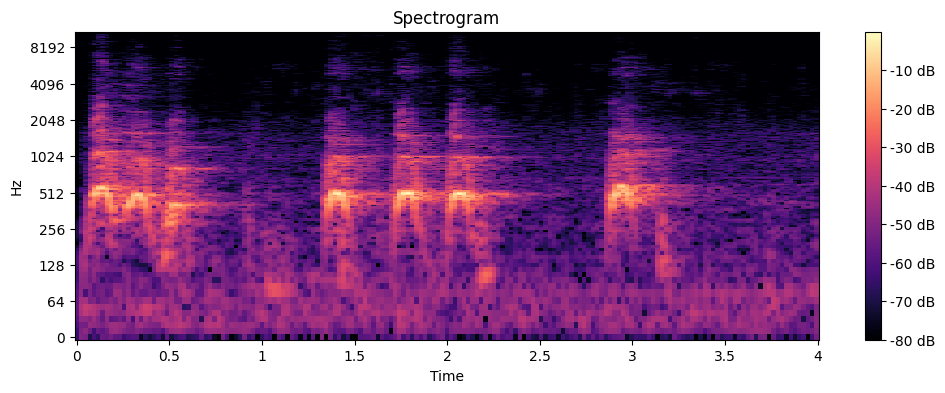

In [8]:
y,sr=librosa.load('7383-3-0-0.wav')
# Set the pre-emphasis coefficient (typically between 0.9 and 1.0)
pre_emphasis_coefficient = 0.97

# Apply pre-emphasis to the audio signal
emphasized_signal = np.append(y[0], y[1:] - pre_emphasis_coefficient * y[:-1])

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Calculate the magnitude and phase of the STFT
magnitude, phase = librosa.magphase(D)

# Visualize the magnitude of the STFT
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

**5) Mel-filter bank: Apply a set of Mel filters to the spectrum:**

The Mel-filter bank is a set of triangular filters that are applied to the power spectrum obtained from the Fast Fourier Transform (FFT).
These filters are designed to mimic the human auditory system's sensitivity to different frequency ranges.
By applying these filters, the power spectrum is transformed into a set of filter bank coefficients, with each coefficient representing the signal's energy within a specific frequency range.

**6) Logarithm: Take the logarithm of the filter bank outputs:**

After obtaining the filter bank coefficients, a common practice is to take the logarithm of each coefficient.
This logarithmic transformation compresses the dynamic range of the coefficients, making them more suitable for various applications and helping to emphasize smaller variations in amplitude.

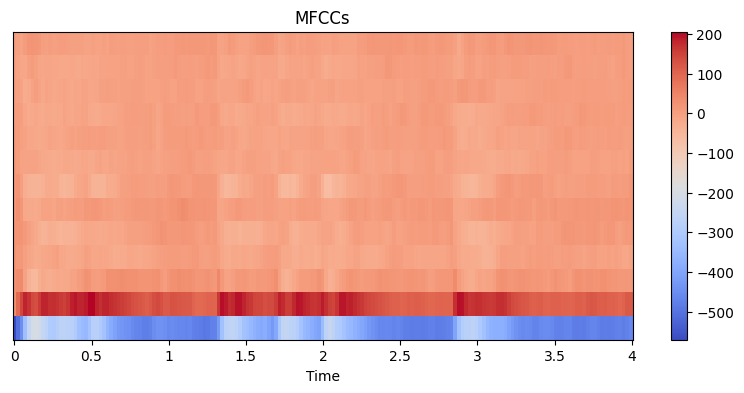

In [9]:
# Calculate the Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()

**7) Discrete Cosine Transform (DCT): Apply DCT to decorrelate the coefficients:**

DCT is applied to the logarithmically transformed filter bank coefficients.
The primary goal of DCT is to decorrelate the coefficients, which means it transforms them into a new set of coefficients that are less correlated with each other.
This decorrelation helps in concentrating important information in a smaller number of coefficients and reducing the redundancy in the data.

**8) Keep the first N coefficients as the MFCC features:**

After applying DCT, the resulting coefficients are sorted by their importance.
Typically, only the first N coefficients are retained as the MFCC features, where N is a parameter determined by the user.
The first few coefficients usually capture the most relevant information about the audio signal, making them suitable for various audio processing tasks, such as speech recognition and audio classification.

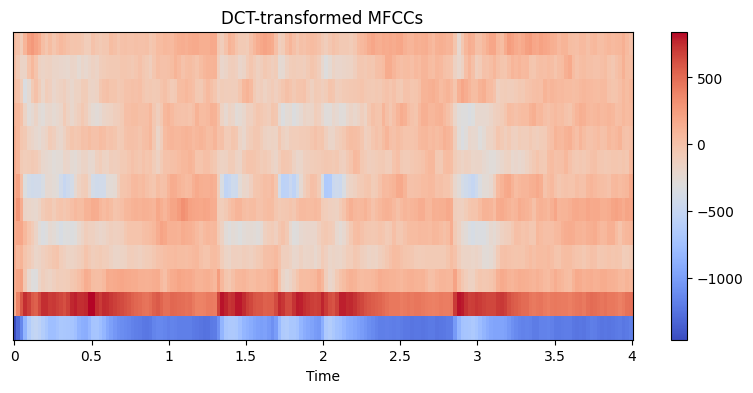

In [11]:
# Perform the Discrete Cosine Transform (DCT) to decorrelate MFCCs
mfccs_dct = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, lifter=22)  # Applying DCT with liftering

# Display the DCT-transformed MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_dct, x_axis='time')
plt.colorbar()
plt.title('DCT-transformed MFCCs')
plt.show()

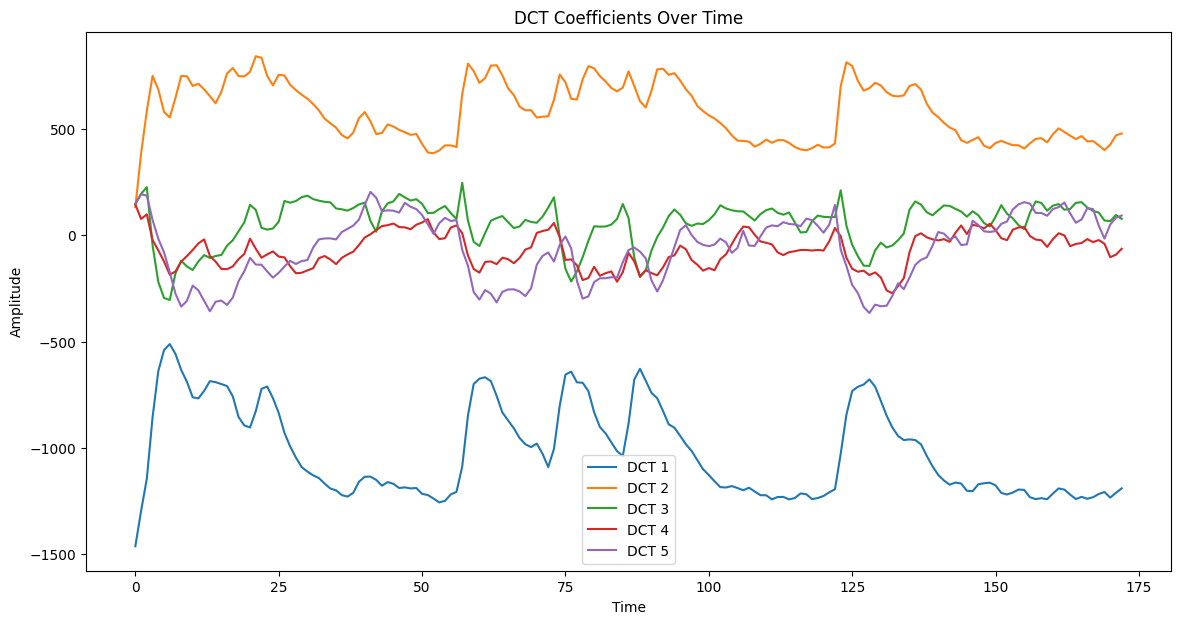

In [13]:
plt.figure(figsize=(14, 7))
for i in range(5):  # 13 MFCC coefficients
    plt.plot(mfccs_dct[i], label=f'DCT {i+1}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('DCT Coefficients Over Time')
plt.legend()
plt.show()

We have 13 DCT coefficients, but in the graph, we have plotted only 5 for better clarity. But the spectrogram(heat map) shows all the coefficients.